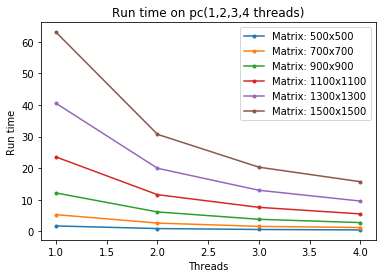

In [12]:
%matplotlib inline
import pandas 
import numpy as np
import matplotlib.pyplot as plts


def DrawPlot(title,data,xlabel,ylabel):
    plt.title(title)
    for i in sorted(set(data['Dimension'])):
        x = data.loc[data.Dimension == i]
        plt.plot(x['Threads'], x['RunTime'], marker=".", label="Matrix: {dim}x{dim}".format(dim = i))
    plt.legend();plt.xlabel(xlabel);plt.ylabel(ylabel)
    plt.show()
    
def ParseData(file):
    parsed_data= pandas.read_csv(file)
    data = parsed_data.groupby(['Threads', 'Dimension'], as_index = False).mean()
    return data

data=ParseData('benchmark.csv')
DrawPlot('Run time on pc(1,2,3,4 threads)',data,'Threads','Run time')
    